# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries

from math import factorial
from scipy import stats as st
import numpy as np
import statistics as stat
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')


In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [5]:
internet_df = pd.read_csv('/datasets/megaline_internet.csv')

In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [8]:
messages_df = pd.read_csv('/datasets/megaline_messages.csv')

In [9]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
messages_df.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [11]:
plans_df = pd.read_csv('/datasets/megaline_plans.csv')

In [12]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
plans_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [14]:
users_df = pd.read_csv('/datasets/megaline_users.csv')

In [15]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [17]:
users_df['churn_date']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
495    NaN
496    NaN
497    NaN
498    NaN
499    NaN
Name: churn_date, Length: 500, dtype: object

I uploaded all the databases then I automatically looked at the info, and checked if there are any missing values for each individual column within the table. Through my analysis churn_date having missing values is a good thing because the actual missing values for it are because those people are currently in an active phone plan with us. 

In [18]:
users_df['churn_date'] = users_df['churn_date'].fillna('in use')


In [19]:
users_df['churn_date']

0      in use
1      in use
2      in use
3      in use
4      in use
        ...  
495    in use
496    in use
497    in use
498    in use
499    in use
Name: churn_date, Length: 500, dtype: object

In this section I checked and looked for all missing values in each dataframe after I uploaded them all. I saw that in the users dataframe there were dataframes missing which is users that are still undercontract with us so I changed the value to be in use so it was easy for others to understand why they are missing. 

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [20]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [21]:
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [22]:
plans_df = plans_df.set_index('plan_name')

In [23]:
plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
plan_name,,,,,,,
surf,50,15360,500,20,10,0.03,0.03
ultimate,1000,30720,3000,70,7,0.01,0.01


In [24]:
# Print a sample of data for plans
plans_df.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [25]:
plans_df = plans_df.rename(columns = {
'gb_per_month_included' : 'mb_per_month_included'})
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
plan_name,,,,,,,
surf,50,15360,500,20,10,0.03,0.03
ultimate,1000,30720,3000,70,7,0.01,0.01


In this table above I see all the column names are well typed out. The mb_per_month_included is the only one that sticks out just because the mb is not what we are measuring in it is gb in the other ones. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [26]:
plans_df['gb_per_month'] = plans_df['mb_per_month_included']/1024

In [27]:
plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month
plan_name,,,,,,,,
surf,50,15360,500,20,10,0.03,0.03,15.0
ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


I took the column of mb_per_month_included and I renamed it to gb_per_month_included. I renamed it gb to keep it consistant with how we are looking at our data it also now is consistantly named with the usd_per_gb column as well. 

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

there are no additional factors in this dataset to adjust!


## Users

In [28]:
# Print the general/summary information about the users' DataFrame
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [29]:
users_df.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [30]:
# Print a sample of data for users
users_df.head(20)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,in use
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,in use
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,in use
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,in use
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,in use
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,in use
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,in use
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,in use
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,in use


This tables general overview is about the users who have services data. you have the user_id column which gives the first, last name, and age of user. It also contains what city and state they are from. and which of the two plans they choose either surf, or ultimate. churn date is the one column that doesn't have perfectly filled out info but as I said in then analysis at the beginning churn_date having missing values is a good thing because that means those people with missing values are still in a phone plan with us that is still active. I would like to seperate the city and state to be two seperate columns. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [31]:
 users_df[['city_region', 'state_region']] = users_df['city'].str.split(',', expand = True)

In [32]:
users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,in use,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,in use,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,in use,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,in use,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,in use,Seattle-Tacoma-Bellevue,WA MSA
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,in use,New Orleans-Metairie,LA MSA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,in use,Los Angeles-Long Beach-Anaheim,CA MSA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA MSA


In [33]:
del users_df['city']

In [34]:
users_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,in use,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,in use,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,in use,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,in use,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,2018-05-23,surf,in use,Seattle-Tacoma-Bellevue,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,in use,New Orleans-Metairie,LA MSA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,in use,Los Angeles-Long Beach-Anaheim,CA MSA
498,1498,Scot,Williamson,51,2018-02-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA MSA


I made new columns seperating the city state and country and renamed the country to make it easier to read and to build it for future expansion of phone services to different territories as well as new countries in the future. 

### Enrich Data

In [35]:
users_df['state_region'] = users_df['state_region'].str.replace('MSA',' USA')

In [36]:
users_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,in use,Atlanta-Sandy Springs-Roswell,GA USA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,in use,Seattle-Tacoma-Bellevue,WA USA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,in use,Las Vegas-Henderson-Paradise,NV USA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,in use,Tulsa,OK USA
4,1004,Leonila,Thompson,40,2018-05-23,surf,in use,Seattle-Tacoma-Bellevue,WA USA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,in use,New Orleans-Metairie,LA USA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,in use,Los Angeles-Long Beach-Anaheim,CA USA
498,1498,Scot,Williamson,51,2018-02-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA


In [37]:
#users_df[['state_region', 'country']] = users_df['state_region'].str.split(' ', expand = True)

In [38]:
users_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,in use,Atlanta-Sandy Springs-Roswell,GA USA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,in use,Seattle-Tacoma-Bellevue,WA USA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,in use,Las Vegas-Henderson-Paradise,NV USA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,in use,Tulsa,OK USA
4,1004,Leonila,Thompson,40,2018-05-23,surf,in use,Seattle-Tacoma-Bellevue,WA USA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,in use,New Orleans-Metairie,LA USA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,in use,Los Angeles-Long Beach-Anaheim,CA USA
498,1498,Scot,Williamson,51,2018-02-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA


[Add additional factors to the data if you believe they might be useful.]

Conclusion = I seperated the city into 3 new columns. one named city_region to capture the regions that were associated with the customers. the second one i made into state_region to clearly 

## Calls

In [39]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [40]:
calls_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [41]:
# Print a sample of data for calls

calls_df.sample(20)

,id,user_id,call_date,duration
102650,1364_178,1364,2018-09-16,0.00
35922,1136_20,1136,2018-10-16,7.44
6662,1031_417,1031,2018-10-26,0.00
32370,1122_208,1122,2018-12-05,2.87
8055,1038_166,1038,2018-11-29,0.00
127360,1456_183,1456,2018-09-10,10.45
8941,1041_376,1041,2018-12-16,10.00
50754,1183_98,1183,2018-11-11,8.05
136282,1494_124,1494,2018-08-01,1.63
95647,1339_21,1339,2018-10-19,11.81


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [42]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')

In [43]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [44]:
calls_df['duration'] = calls_df['duration'].apply(np.ceil)


In [45]:
calls_df['duration'] = calls_df['duration'].astype(int)

In [46]:
calls_df['duration']


0          9
1         14
2         15
3          6
4          5
          ..
137730     9
137731    11
137732     9
137733     1
137734    14
Name: duration, Length: 137735, dtype: int64

Conclusion = In the calls data I rounded up the duration to the nearest whole number. 

## Messages

In [47]:
# Print the general/summary information about the messages' DataFrame

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [48]:
display(messages_df)
messages_df.describe()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [49]:
# Print a sample of data for messages

messages_df.sample(20)

,id,user_id,message_date
49861,1328_819,1328,2018-12-20
12900,1084_140,1084,2018-11-06
66942,1434_508,1434,2018-11-16
62211,1391_209,1391,2018-09-27
49918,1328_876,1328,2018-06-23
17699,1114_812,1114,2018-10-01
18627,1120_484,1120,2018-07-23
59445,1375_282,1375,2018-12-16
66657,1434_185,1434,2018-09-07
6833,1057_157,1057,2018-09-28


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Conclusion = Everything in this message data looks alright 

### Fix data

[Fix obvious issues with the data given the initial observations.]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [50]:
# Print the general/summary information about the internet DataFrame

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [51]:
display(internet_df)
internet_df.describe()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [52]:
# Print a sample of data for the internet traffic

internet_df.sample(42)

,id,user_id,session_date,mb_used
19796,1090_27,1090,2018-12-06,187.14
6643,1038_131,1038,2018-11-16,0.00
81128,1380_50,1380,2018-11-19,405.01
79657,1372_4,1372,2018-12-30,109.32
48092,1214_466,1214,2018-07-26,175.50
46854,1209_68,1209,2018-12-07,421.97
94560,1440_198,1440,2018-10-04,0.00
95773,1446_352,1446,2018-09-13,0.00
14208,1066_97,1066,2018-10-16,189.00
26476,1122_431,1122,2018-05-21,141.01


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [53]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format = '%Y-%m-%d')

In [54]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Conclusion = the main thing I changed was making the Datatype for session_date a date time. 

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [55]:
# Print out the plan conditions and make sure they are clear for you
display(plans_df)
display(calls_df)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month
plan_name,,,,,,,,
surf,50,15360,500,20,10,0.03,0.03,15.0
ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


In [56]:
## Aggregate data per user



#[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]



In [57]:
# Calculate the number of calls made by each user per month. Save the result.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
calls_df['month'] = calls_df['call_date'].dt.month
calls_per_month = calls_df.groupby(['user_id', 'month'])['user_id'].agg(['count']).reset_index()
calls_per_month

,user_id,month,count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [58]:
# Calculate the amount of minutes spent by each user per month. Save the result.

minutes_per_month = calls_df.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [59]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
messages_df['month'] = messages_df['message_date'].dt.month
messages_per_month = messages_df.groupby(['user_id', 'month'])['user_id'].agg(['count']).reset_index()
messages_per_month


,user_id,month,count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [60]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
internet_df['month'] = internet_df['session_date'].dt.month
traffic_per_month = internet_df.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
traffic_per_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [61]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#concat_df = calls_per_month.set_index('user_id', 'month').join([minutes_per_month, messages_per_month, traffic_per_month]).reset_index().head(20)

merge_df = pd.merge(calls_per_month, minutes_per_month, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer').merge(messages_per_month, on=['user_id', 
 'month']).merge(traffic_per_month, on=['user_id', 'month'],  how='outer')

merge_df


,user_id,month,count_x,duration,count_y,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2286,1498,12,NaN,NaN,NaN,23137.69
2287,1499,9,NaN,NaN,NaN,12984.76
2288,1499,10,NaN,NaN,NaN,19492.43
2289,1499,11,NaN,NaN,NaN,16813.83


In [62]:
merge_df.rename(columns= {'count_x': 'call_counts', 'count_y': 'num_of_messages'}, inplace=True)
merge_df

,user_id,month,call_counts,duration,num_of_messages,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2286,1498,12,NaN,NaN,NaN,23137.69
2287,1499,9,NaN,NaN,NaN,12984.76
2288,1499,10,NaN,NaN,NaN,19492.43
2289,1499,11,NaN,NaN,NaN,16813.83


In [63]:
merge_df['call_counts'] = merge_df['call_counts'].fillna(0)
merge_df['duration'] = merge_df['duration'].fillna(0)
merge_df['num_of_messages'] = merge_df['num_of_messages'].fillna(0)

In [64]:
merge_df['mb_used'] = merge_df['mb_used'].apply(np.ceil)
merge_df

,user_id,month,call_counts,duration,num_of_messages,mb_used
0,1000,12,16.0,124.0,11.0,1902.0
1,1001,8,27.0,182.0,30.0,6920.0
2,1001,9,49.0,315.0,44.0,13315.0
3,1001,10,65.0,393.0,53.0,22331.0
4,1001,11,64.0,426.0,36.0,18505.0
...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0
2287,1499,9,0.0,0.0,0.0,12985.0
2288,1499,10,0.0,0.0,0.0,19493.0
2289,1499,11,0.0,0.0,0.0,16814.0


In [65]:
merge_df['gb_used_sum'] = merge_df['mb_used']/1024
merge_df['gb_used_sum'] = merge_df['gb_used_sum'].apply(np.ceil)
merge_df

,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum
0,1000,12,16.0,124.0,11.0,1902.0,2.0
1,1001,8,27.0,182.0,30.0,6920.0,7.0
2,1001,9,49.0,315.0,44.0,13315.0,14.0
3,1001,10,65.0,393.0,53.0,22331.0,22.0
4,1001,11,64.0,426.0,36.0,18505.0,19.0
...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0
2287,1499,9,0.0,0.0,0.0,12985.0,13.0
2288,1499,10,0.0,0.0,0.0,19493.0,20.0
2289,1499,11,0.0,0.0,0.0,16814.0,17.0


In [66]:
merge_df = merge_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')
display(users_df)
merge_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,in use,Atlanta-Sandy Springs-Roswell,GA USA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,in use,Seattle-Tacoma-Bellevue,WA USA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,in use,Las Vegas-Henderson-Paradise,NV USA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,in use,Tulsa,OK USA
4,1004,Leonila,Thompson,40,2018-05-23,surf,in use,Seattle-Tacoma-Bellevue,WA USA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,in use,New Orleans-Metairie,LA USA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,in use,Los Angeles-Long Beach-Anaheim,CA USA
498,1498,Scot,Williamson,51,2018-02-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA


,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate
1,1001,8,27.0,182.0,30.0,6920.0,7.0,surf
2,1001,9,49.0,315.0,44.0,13315.0,14.0,surf
3,1001,10,65.0,393.0,53.0,22331.0,22.0,surf
4,1001,11,64.0,426.0,36.0,18505.0,19.0,surf
...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf


In [67]:
rev_df = merge_df.merge(plans_df, left_on='plan', right_on='plan_name')
rev_df.sort_values(['user_id', 'month'])
rev_df

,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1006,11,2.0,10.0,15.0,2069.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
2,1006,12,9.0,59.0,139.0,32119.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
3,1008,10,71.0,476.0,21.0,17107.0,17.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
4,1008,11,63.0,446.0,37.0,23677.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0


In this section. I added the calls, messages, minutes, and internet sections together in one table. as well as put them to be calculated in gb. Then I added the users with the plans dataframes in order to get each plan and user along with how many mbs they used for each month then I created a new column converting the mbs used to gigabytes. 

In [68]:
def calc_text_messages(row):
    row['messages_over_plan'] = row['num_of_messages'] - row['messages_included']
    if row['messages_over_plan'] > row['messages_included']:
        row['text_over_amount_due'] = row['messages_over_plan'] * row['usd_per_message']
    else:
        row['text_over_amount_due'] = 0
        
    return row
over_use_messages_df = rev_df.apply(calc_text_messages, axis=1)
over_use_messages_df

,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month,messages_over_plan,text_over_amount_due
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-989.0,0.0
1,1006,11,2.0,10.0,15.0,2069.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-985.0,0.0
2,1006,12,9.0,59.0,139.0,32119.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-861.0,0.0
3,1008,10,71.0,476.0,21.0,17107.0,17.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-979.0,0.0
4,1008,11,63.0,446.0,37.0,23677.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-963.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0


In [69]:
def calc_internet_amount(row):
    row['internet_over_plan'] = row['gb_used_sum'] - row['gb_per_month']
    if row['internet_over_plan'] > row['gb_per_month']:
        row['internet_over_amount_due'] = row['internet_over_plan'] * row['usd_per_gb']
    else:
        row['internet_over_amount_due'] = 0
        
    return row
over_use_internet_df = over_use_messages_df.apply(calc_internet_amount, axis=1)
over_use_internet_df


,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month,messages_over_plan,text_over_amount_due,internet_over_plan,internet_over_amount_due
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-989.0,0.0,-28.0,0.0
1,1006,11,2.0,10.0,15.0,2069.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-985.0,0.0,-27.0,0.0
2,1006,12,9.0,59.0,139.0,32119.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-861.0,0.0,2.0,0.0
3,1008,10,71.0,476.0,21.0,17107.0,17.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-979.0,0.0,-13.0,0.0
4,1008,11,63.0,446.0,37.0,23677.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,-963.0,0.0,-6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0,8.0,0.0
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0,-2.0,0.0
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0,5.0,0.0
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0,-50.0,0.0,2.0,0.0


In [70]:
def calc_call_mins(row):
    row['calls_over_plan'] = row['duration'] - row['minutes_included']
    if row['calls_over_plan'] > row['minutes_included']:
        row['call_over_amount_due'] = row['duration'] * row['usd_per_minute']
    else:
        row['call_over_amount_due'] = 0
        
    return row
over_use_calls_df = over_use_internet_df.apply(calc_call_mins, axis=1)
over_use_calls_df

,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month,messages_over_plan,text_over_amount_due,internet_over_plan,internet_over_amount_due,calls_over_plan,call_over_amount_due
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate,1000,30720,...,7,0.01,0.01,30.0,-989.0,0.0,-28.0,0.0,-2876.0,0.0
1,1006,11,2.0,10.0,15.0,2069.0,3.0,ultimate,1000,30720,...,7,0.01,0.01,30.0,-985.0,0.0,-27.0,0.0,-2990.0,0.0
2,1006,12,9.0,59.0,139.0,32119.0,32.0,ultimate,1000,30720,...,7,0.01,0.01,30.0,-861.0,0.0,2.0,0.0,-2941.0,0.0
3,1008,10,71.0,476.0,21.0,17107.0,17.0,ultimate,1000,30720,...,7,0.01,0.01,30.0,-979.0,0.0,-13.0,0.0,-2524.0,0.0
4,1008,11,63.0,446.0,37.0,23677.0,24.0,ultimate,1000,30720,...,7,0.01,0.01,30.0,-963.0,0.0,-6.0,0.0,-2554.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf,50,15360,...,10,0.03,0.03,15.0,-50.0,0.0,8.0,0.0,-500.0,0.0
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf,50,15360,...,10,0.03,0.03,15.0,-50.0,0.0,-2.0,0.0,-500.0,0.0
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf,50,15360,...,10,0.03,0.03,15.0,-50.0,0.0,5.0,0.0,-500.0,0.0
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf,50,15360,...,10,0.03,0.03,15.0,-50.0,0.0,2.0,0.0,-500.0,0.0


In [71]:
# caluculate the revenue for call per month


"""


def calculate_monthly_revenue(row):
    calls = row['call_counts'] - row['minutes_included']
    messages = row['num_of_messages'] - row['messages_included']
    gb_used = row['gb_used_sum'] - row['gb_per_month'] * 1024
          
    if calls > 0:
        calls_cost = calls * row['usd_per_minute']
    else:
        calls_cost = 0
        
    if messages > 0:
        messages_cost = messages * row['usd_per_message']
    else:
        messages_cost = 0
        
    if gb_used > 0:
        gb_cost = gb_used * row['usd_per_gb']
    else:
        gb_cost = 0
        
    if row['plan'] == 'ultimate':
        monthly_charge = 70
    else:
        monthly_charge = 20
    
    total_cost = calls_cost + messages_cost + mb_cost + gb_cost + monthly_charge
    
    return total_cost

    rev_df['monthly_revenue'] = rev_df.apply(calculate_monthly_revenue, axis=1)
    def calc_call_mins(row):
    row['calls_over_plan'] = row['duration'] - row['minutes_included']
    if row['calls_over_plan'] > row['minutes_included']:
        row['call_over_amount_due'] = row['mins_over_plan'] * row['usd_per_minute']
    else:
        row['call_over_amount_due'] = 0
        
    return row
over_use_calls_df = rev_df.apply(calc_call_mins, axis=1)
over_use_calls_df

def calc_text_messages(row):
    row['messages_over_plan'] = row['num_of_messages'] - row['messages_included']
    if row['messages_over_plan'] > row['messages_included']:
        row['text_over_amount_due'] = row['messages_over_plan'] * row['usd_per_message']
    else:
        row['text_over_amount_due'] = 0
        
    return row
over_use_text_df = rev_df.apply(calc_text_messages, axis=1)
over_use_text_df

def calc_internet_amount(row):
    row['internet_over_plan'] = row['gb_used_sum'] - row['gb_per_month']
    if row['internet_over_plan'] > row['gb_per_month']:
        row['internet_over_amount_due'] = row['internet_over_plan'] * row['usd_per_gb']
    else:
        row['internet_over_amount_due'] = 0
        
    return row
over_use_internet_df = rev_df.apply(calc_internet_amount, axis=1)
over_use_internet_df

additonal_mins = 0 
additional_message = 0 
additional_data
Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10
Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7


"""
def month_revenue(row):
    additional_mins = 0
    additional_message = 0
    additional_data_gb = 0
    surf_base = 20
    ultimate_base = 70
    plan = row['plan']
    if plan == 'surf':
        if row['duration'] > 500:
            additional_mins = row['duration'] - 500
        if row['num_of_messages'] > 50:
            additional_message = row['num_of_messages'] - 50
        if row['gb_used_sum'] > 15:
            additional_data_gb = row['gb_used_sum'] - 15
        profit = np.ceil((additional_mins * 0.03) + (additional_message * 0.03) + (additional_data_gb * 10))
        if profit == 0: 
            return surf_base
        else:
            return profit + surf_base
    if plan == 'ultimate':
        if row['duration'] > 3000:
            additional_mins = row['duration'] - 3000
        if row['num_of_messages'] > 1000:
            additional_message = row['num_of_messages'] - 1000
        if row['gb_used_sum'] > 30:
            additional_data_gb = row['gb_used_sum'] - 30
        profit = np.ceil((additional_mins * 0.01) + (additional_message * 0.01) + (additional_data_gb * 7))
        if profit == 0:
            return surf_base
        else: 
            return profit + surf_base
        
over_use_calls_df['month_revenue'] = over_use_calls_df.apply(month_revenue, axis=1)
over_use_calls_df


,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,usd_per_message,usd_per_minute,gb_per_month,messages_over_plan,text_over_amount_due,internet_over_plan,internet_over_amount_due,calls_over_plan,call_over_amount_due,month_revenue
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate,1000,30720,...,0.01,0.01,30.0,-989.0,0.0,-28.0,0.0,-2876.0,0.0,20.0
1,1006,11,2.0,10.0,15.0,2069.0,3.0,ultimate,1000,30720,...,0.01,0.01,30.0,-985.0,0.0,-27.0,0.0,-2990.0,0.0,20.0
2,1006,12,9.0,59.0,139.0,32119.0,32.0,ultimate,1000,30720,...,0.01,0.01,30.0,-861.0,0.0,2.0,0.0,-2941.0,0.0,34.0
3,1008,10,71.0,476.0,21.0,17107.0,17.0,ultimate,1000,30720,...,0.01,0.01,30.0,-979.0,0.0,-13.0,0.0,-2524.0,0.0,20.0
4,1008,11,63.0,446.0,37.0,23677.0,24.0,ultimate,1000,30720,...,0.01,0.01,30.0,-963.0,0.0,-6.0,0.0,-2554.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf,50,15360,...,0.03,0.03,15.0,-50.0,0.0,8.0,0.0,-500.0,0.0,100.0
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf,50,15360,...,0.03,0.03,15.0,-50.0,0.0,-2.0,0.0,-500.0,0.0,20.0
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf,50,15360,...,0.03,0.03,15.0,-50.0,0.0,5.0,0.0,-500.0,0.0,70.0
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf,50,15360,...,0.03,0.03,15.0,-50.0,0.0,2.0,0.0,-500.0,0.0,40.0


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [72]:
# Calculate the monthly revenue for each user



personal_month_total = over_use_calls_df.pivot_table(index=['user_id','month','plan'],values='month_revenue',aggfunc='first')
personal_month_total


month_revenue
user_id month plan                   
1000    12    ultimate           20.0
1001    8     surf               20.0
        9     surf               20.0
        10    surf               91.0
        11    surf               60.0
...                               ...
1498    12    surf              100.0
1499    9     surf               20.0
        10    surf               70.0
        11    surf               40.0
        12    surf               90.0

[2291 rows x 1 columns]

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<AxesSubplot:title={'center':'ultimate calls per month'}, xlabel='plan, month', ylabel='avg duration'>

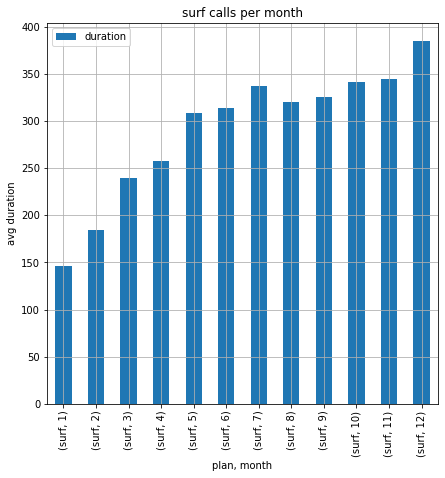

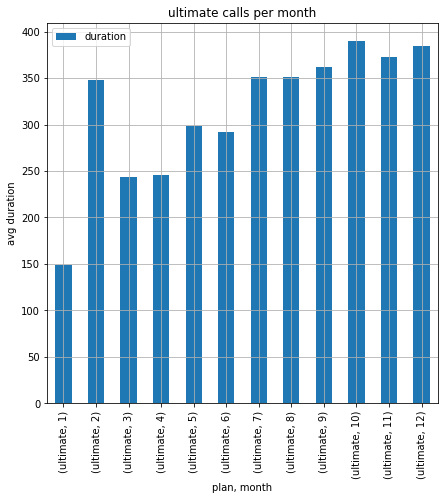

In [73]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

calls_per_plan_per_month = over_use_calls_df.pivot_table(index=['plan','month'],values='duration')

calls_per_plan_per_month['duration'] = calls_per_plan_per_month['duration'].apply(np.ceil).astype('int')
calls_per_plan_per_month.loc[('surf',slice(None)),:].plot(title='surf calls per month',xlabel='plan, month',ylabel='avg duration', y='duration', kind='bar',grid=True, figsize=(7,7))
calls_per_plan_per_month.loc[('ultimate',slice(None)),:].plot(title='ultimate calls per month',xlabel='plan, month',ylabel='avg duration', y='duration', kind='bar',grid=True, figsize=(7,7))


In [74]:
over_use_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291 entries, 0 to 2290
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   2291 non-null   int64  
 1   month                     2291 non-null   int64  
 2   call_counts               2291 non-null   float64
 3   duration                  2291 non-null   float64
 4   num_of_messages           2291 non-null   float64
 5   mb_used                   2277 non-null   float64
 6   gb_used_sum               2277 non-null   float64
 7   plan                      2291 non-null   object 
 8   messages_included         2291 non-null   int64  
 9   mb_per_month_included     2291 non-null   int64  
 10  minutes_included          2291 non-null   int64  
 11  usd_monthly_pay           2291 non-null   int64  
 12  usd_per_gb                2291 non-null   int64  
 13  usd_per_message           2291 non-null   float64
 14  usd_per_

In [75]:
months = list(over_use_calls_df['month'].value_counts().index)
months = sorted(months)
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

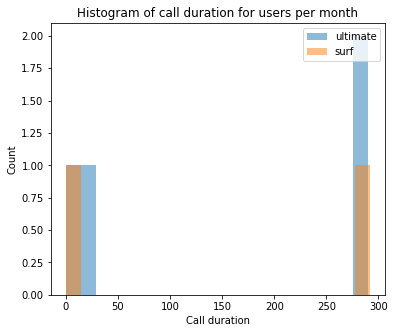

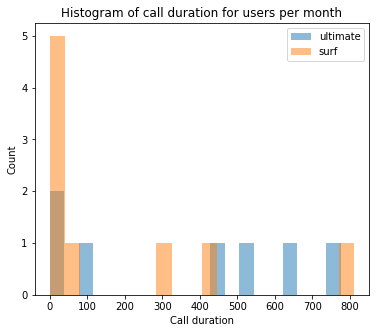

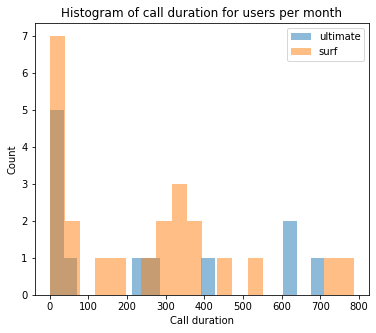

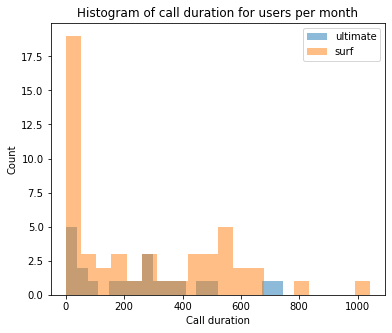

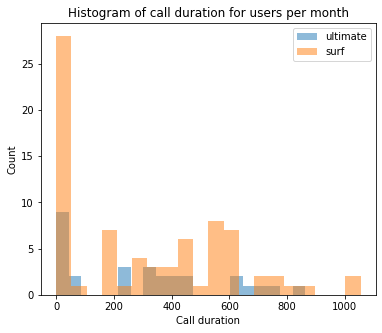

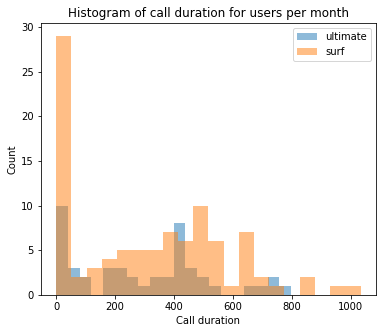

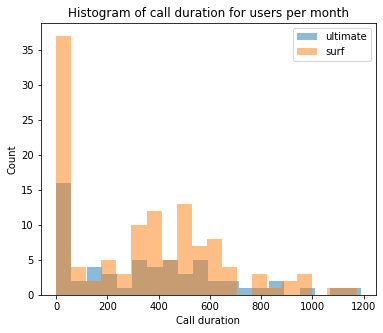

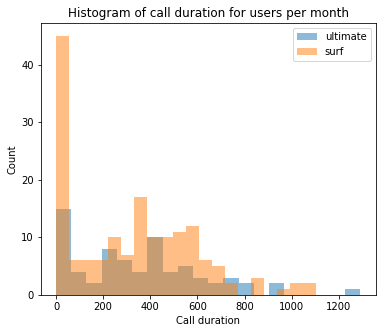

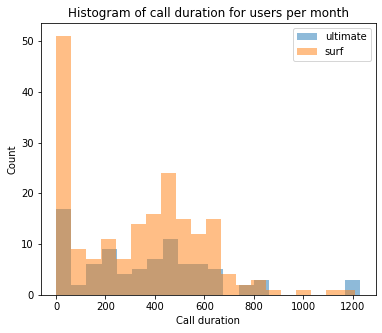

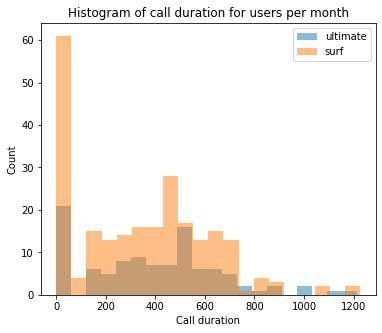

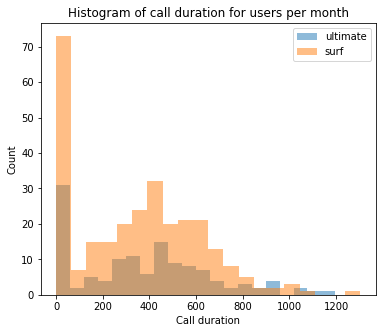

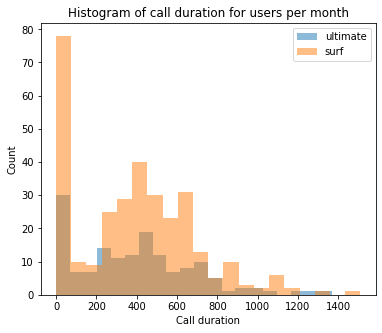

In [76]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
months = list(over_use_calls_df['month'].value_counts().index)
months = sorted(months)


for month in months:
    total_rev_df_month = over_use_calls_df[over_use_calls_df['month'] == month]
    
    
    plt.figure(figsize=(6,5))
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='ultimate','duration'], bins=20, alpha=0.5, label='ultimate')
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='surf', 'duration'], bins=20, alpha=0.5, label='surf')

    plt.xlabel('Call duration', size=10)
    plt.ylabel('Count', size=10)
    plt.title('Histogram of call duration for users per month')
    plt.legend(loc='upper right');


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [77]:
# Calculate the mean and the variance of the monthly call duration


calls_pivot_table = over_use_calls_df.pivot_table(index=['plan','month'],values='duration',aggfunc=['mean','std','var','median'])
calls_pivot_table.columns = ['mean','std','var','median']
calls_pivot_table

mean         std            var  median
plan     month                                               
surf     1      146.000000  206.475180   42632.000000   146.0
         2      184.000000  284.642759   81021.500000    39.0
         3      239.956522  236.023781   55707.225296   247.0
         4      257.240000  267.907200   71774.267755   170.0
         5      308.714286  290.088047   84151.075188   295.0
         6      313.041237  266.487293   71015.477448   313.0
         7      336.867769  295.079705   87072.032369   350.0
         8      320.142857  273.521659   74814.098214   335.0
         9      325.237113  261.552609   68409.767320   345.5
         10     341.924051  272.108206   74042.875563   351.0
         11     344.353357  270.467029   73152.413703   367.0
         12     384.839623  301.272982   90765.409529   396.0
ultimate 1      148.250000  162.083055   26270.916667   151.5
         2      347.714286  316.787370  100354.238095   428.0
         3      242.250000  281.403342   79187.840909   135.5
         4      245.904762  224.676413   50479.490476   239.0
         5      297.034483  272.169391   74076.177340   329.0
         6      292.000000  233.649682   54592.173913   306.0
         7      350.220339  309.841342   96001.657510   314.0
         8      350.380282  279.531361   78137.781891   340.0
         9      361.267442  283.781209   80531.774692   351.5
         10     389.742857  278.775690   77715.885165   409.0
         11     372.716535  294.528434   86746.998375   377.0
         12     383.523179  293.081032   85896.491126   369.0

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display them.


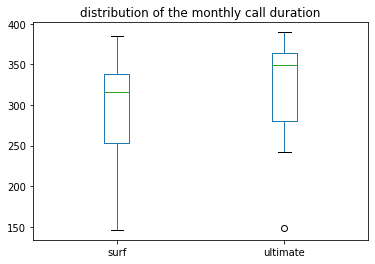

In [78]:
# Plot a boxplot to visualize the distribution of the monthly call duration
pivot_box_duration = over_use_calls_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='duration',
                                       )

pivot_box_duration.plot(kind='box', title='distribution of the monthly call duration')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

between plans there is a difference. for the surf you have a very large range between what people use per month but the majority of users are in the 250 to 350 range with the average around 325. where the ultimate users that pay for more monthly minutes are all consolidated with less of a range but there average is about 350. 

### Messages

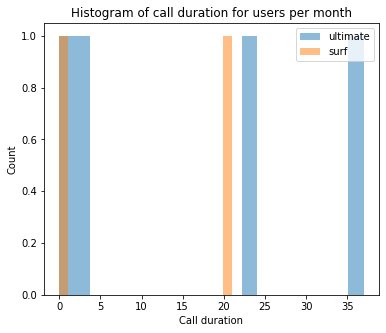

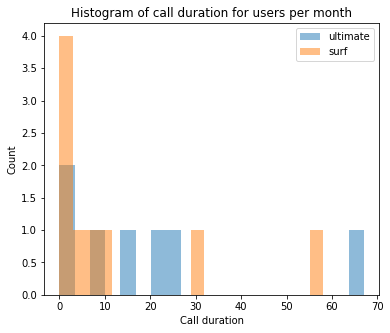

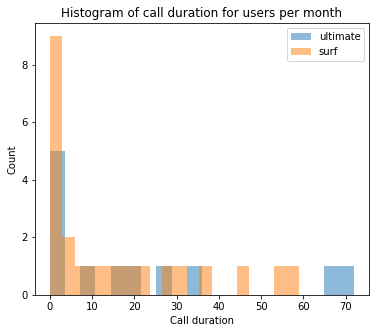

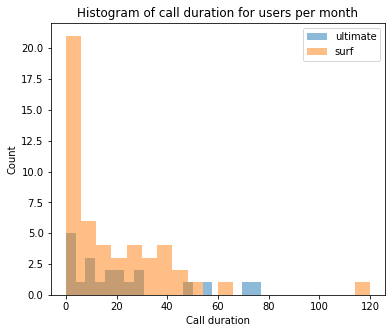

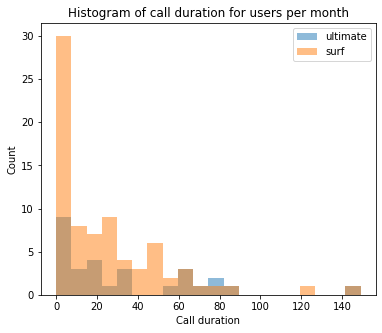

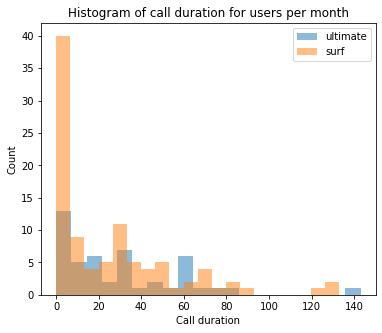

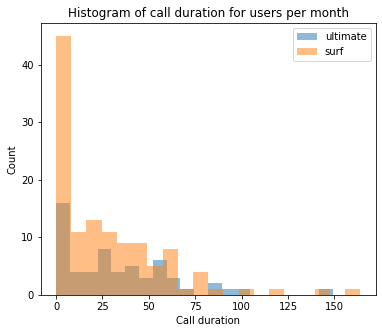

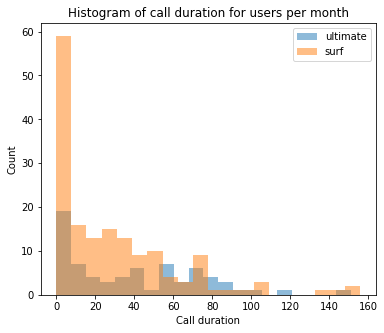

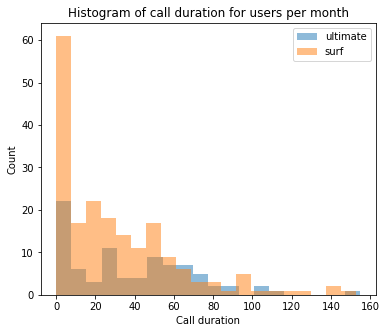

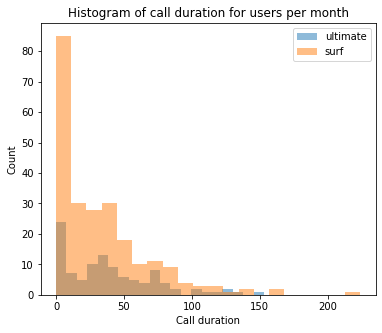

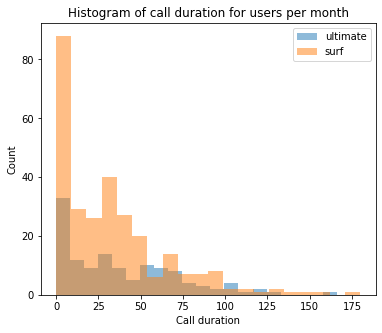

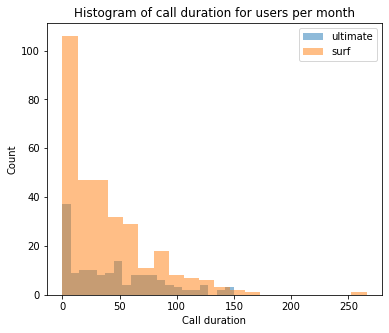

In [79]:
# Compare the number of messages users of each plan tend to send each month
months = list(over_use_calls_df['month'].value_counts().index)
months = sorted(months)


for month in months:
    total_rev_df_month = over_use_calls_df[over_use_calls_df['month'] == month]
    
    
    plt.figure(figsize=(6,5))
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='ultimate','num_of_messages'], bins=20, alpha=0.5, label='ultimate')
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='surf', 'num_of_messages'], bins=20, alpha=0.5, label='surf')

    plt.xlabel('Call duration', size=10)
    plt.ylabel('Count', size=10)
    plt.title('Histogram of call duration for users per month')
    plt.legend(loc='upper right');

In [80]:
# Compare the amount of internet traffic consumed by users per plan
messages_pivot_table = over_use_calls_df.pivot_table(index=['plan', 'month'],values='num_of_messages',aggfunc=['mean','var'])
#messages_pivot_table.columns = ['mean','std','var','median']
messages_pivot_table



mean             var
               num_of_messages num_of_messages
plan     month                                
surf     1           10.500000      220.500000
         2           12.000000      386.000000
         3           15.260870      346.565217
         4           17.400000      501.591837
         5           23.753247      855.451470
         6           25.020619      921.478737
         7           26.801653      929.943664
         8           28.496894     1043.876553
         9           29.907216     1001.359222
         10          32.565401     1274.568798
         11          31.434629     1069.395534
         12          37.371069     1473.186794
ultimate 1           15.500000      313.666667
         2           19.857143      537.142857
         3           20.250000      654.386364
         4           22.047619      544.147619
         5           32.103448     1297.310345
         6           29.234043      863.444033
         7           32.830508      960.488019
         8           38.478873     1196.367404
         9           37.895349     1050.918331
         10          39.800000     1219.238462
         11          38.275591     1244.296463
         12          44.490066     1555.398234

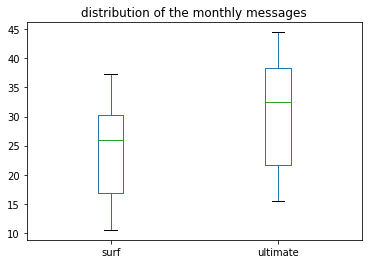

In [81]:
pivot_box_messages = over_use_calls_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='num_of_messages',
                                       )

pivot_box_messages.plot(kind='box', title='distribution of the monthly messages')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

there is a difference between the surf and the ultimat users the surf users are hovering around 25 messages per month on average and the ultimate users have a way larger range but it seems like the majority are using about 30- 35 a month. 

### Internet

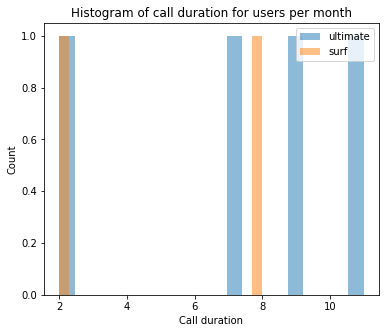

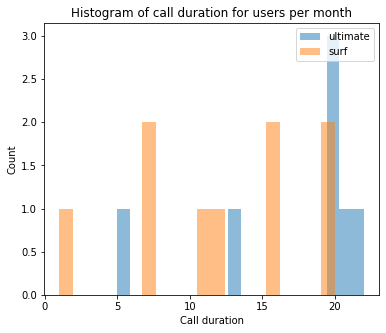

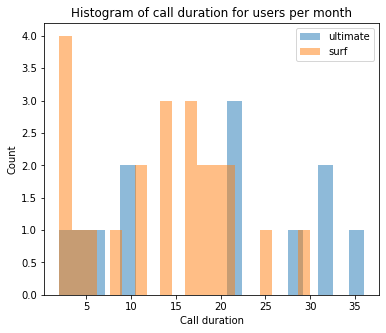

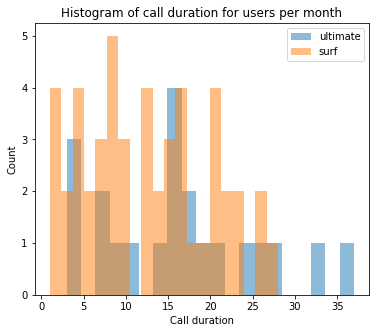

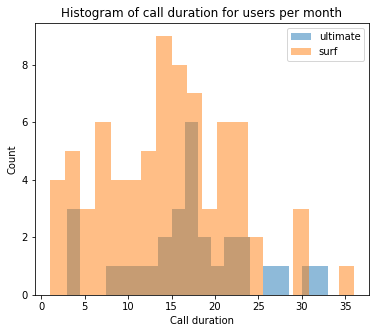

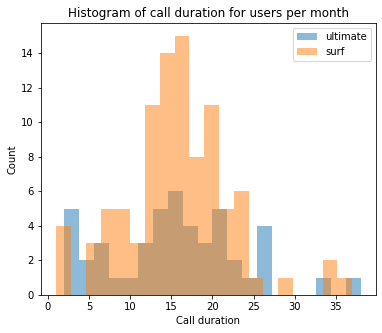

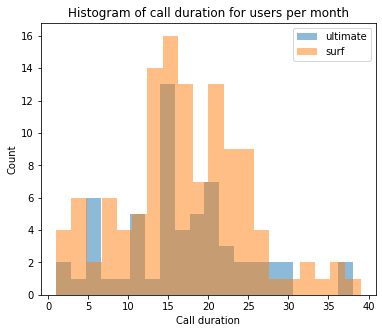

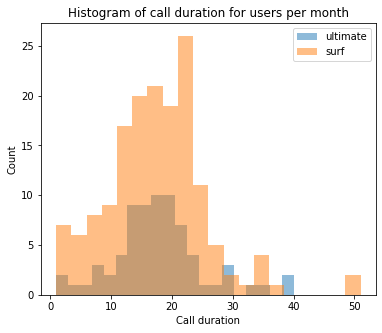

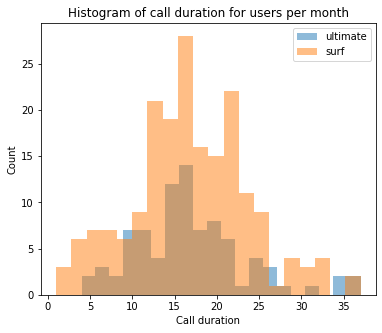

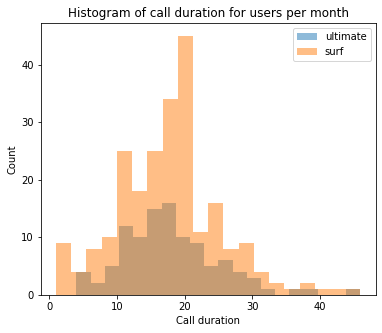

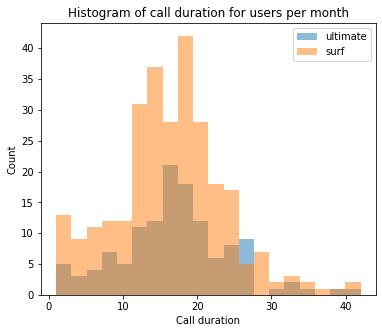

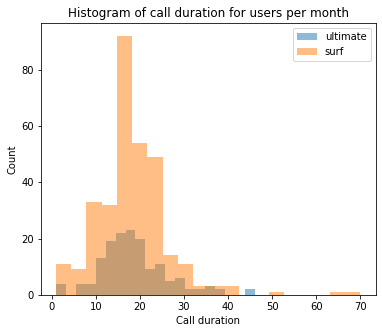

In [82]:
months = list(over_use_calls_df['month'].value_counts().index)
months = sorted(months)


for month in months:
    total_rev_df_month = over_use_calls_df[over_use_calls_df['month'] == month]
    
    
    plt.figure(figsize=(6,5))
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='ultimate','gb_used_sum'], bins=20, alpha=0.5, label='ultimate')
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='surf', 'gb_used_sum'], bins=20, alpha=0.5, label='surf')

    plt.xlabel('Call duration', size=10)
    plt.ylabel('Count', size=10)
    plt.title('Histogram of call duration for users per month')
    plt.legend(loc='upper right');

In [83]:
messages_pivot_table = over_use_calls_df.pivot_table(index=['plan','month'],values='gb_used_sum',aggfunc=['mean','std','var','median'])
messages_pivot_table.columns = ['mean','std','var','median']
messages_pivot_table


mean        std         var  median
plan     month                                          
surf     1       5.000000   4.242641   18.000000     5.0
         2      12.222222   6.437736   41.444444    12.0
         3      13.565217   7.999012   63.984190    14.0
         4      12.469388   7.362920   54.212585    12.0
         5      14.302632   7.501146   56.267193    14.0
         6      15.810526   6.599959   43.559462    16.0
         7      17.016667   7.718779   59.579552    17.0
         8      17.201258   8.201405   67.263036    17.0
         9      16.777202   6.930992   48.038644    17.0
         10     17.632479   7.586523   57.555335    18.0
         11     16.548043   7.283936   53.055719    17.0
         12     18.296530   8.268846   68.373817    18.0
ultimate 1       7.250000   3.862210   14.916667     8.0
         2      17.285714   6.156684   37.904762    20.0
         3      18.416667  11.774073  138.628788    21.0
         4      16.333333   9.264628   85.833333    16.0
         5      16.862069   7.361697   54.194581    17.0
         6      15.425532   8.298100   68.858464    15.0
         7      16.491525   8.015874   64.254237    15.0
         8      17.845070   7.618864   58.047082    18.0
         9      17.011628   6.874495   47.258687    16.5
         10     17.885714   7.216853   52.082967    17.0
         11     17.118110   7.375005   54.390701    17.0
         12     18.397351   7.670793   58.841060    17.0

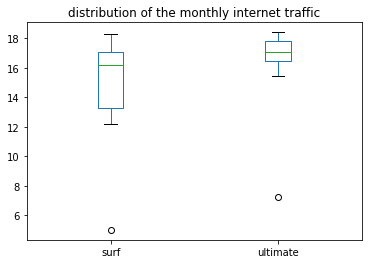

In [84]:
pivot_box_internet = over_use_calls_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='gb_used_sum',
                                       )

pivot_box_internet.plot(kind='box', title='distribution of the monthly internet traffic')
plt.show()


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

there is a difference and the surf users use less compared to the ultimate. the ultimate uses tend to use between 16-18 and the surf users have a wider range somewhere between 14 to 17. 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

From the plot the median value of the surf users is lower than the ultimate there is also a higher spread of values for the surf users. where as the ultimate users are using about half of the monthly features they are spending for.


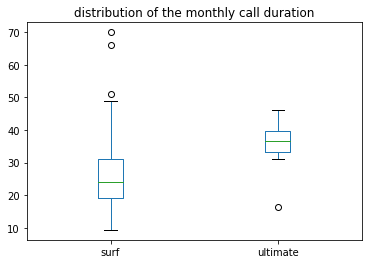

In [85]:
pivot_box_internet = over_use_calls_df.pivot_table( index= 'month_revenue',
                                       columns='plan',
                                       values='gb_used_sum',
                                       )

pivot_box_internet.plot(kind='box', title='distribution of the monthly call duration')
plt.show()

In [86]:
rev_data = over_use_calls_df.pivot_table(index=['plan','month'],values='month_revenue',aggfunc=['mean','std','var','median'])
rev_data.columns = ['mean','std','var','median']
rev_data[['mean','median']] = rev_data[['mean','median']].round(decimals=2)
rev_data[['std','var']] = rev_data[['std','var']].apply(np.ceil).astype('int')
rev_data

mean  std   var  median
plan     month                          
surf     1      20.00    0     0    20.0
         2      34.44   21   428    30.0
         3      46.00   39  1513    20.0
         4      40.76   35  1195    20.0
         5      47.65   45  1954    22.0
         6      49.05   45  1983    31.0
         7      62.40   54  2911    41.0
         8      64.07   60  3593    43.0
         9      58.17   48  2262    40.0
         10     65.30   57  3195    50.0
         11     57.93   50  2488    40.0
         12     70.43   68  4603    50.0
ultimate 1      20.00    0     0    20.0
         2      20.00    0     0    20.0
         3      24.67   13   146    20.0
         4      23.00   11   121    20.0
         5      20.72    4    16    20.0
         6      21.64    9    76    20.0
         7      21.90   11   105    20.0
         8      22.86   13   155    20.0
         9      22.03    9    76    20.0
         10     22.33   14   172    20.0
         11     21.71   10    95    20.0
         12     23.29   15   213    20.0

[Formulate conclusions about how the revenue differs between the plans.]

In the Surf plan there are many users going way over their calls duration which would make it more beneficial for
them to go to the Ultimate plan. where there are very few outliers in the ultimate plan. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [87]:
sample_1 = list(over_use_calls_df.query('plan == "surf"')['month_revenue'])
sample_2 = list(over_use_calls_df.query('plan == "ultimate"')['month_revenue'])

results = st.ttest_ind(sample_1, sample_2, equal_var = False) 

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
    print("The means of both are to different.")
else:
    print('We cannot reject the null hypothesis')
    print("The means of both are the same.")


p-value:  2.6317640754777767e-129
We reject the null hypothesis
The means of both are to different.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

Null hypothesis: The average revenue from users in the NY-NJ area does not differ from that of the users from the other regions.
<br> Alternative hypothesis: The average revenue from users in the NY-NJ area does differ from that of the users from the other regions.

In [88]:
#users_df["state_region"].unique()
users_df.info()
users_df["city_region"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       500 non-null    int64 
 1   first_name    500 non-null    object
 2   last_name     500 non-null    object
 3   age           500 non-null    int64 
 4   reg_date      500 non-null    object
 5   plan          500 non-null    object
 6   churn_date    500 non-null    object
 7   city_region   500 non-null    object
 8   state_region  500 non-null    object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


0       Atlanta-Sandy Springs-Roswell
1             Seattle-Tacoma-Bellevue
2        Las Vegas-Henderson-Paradise
3                               Tulsa
4             Seattle-Tacoma-Bellevue
                    ...              
495       New York-Newark-Jersey City
496              New Orleans-Metairie
497    Los Angeles-Long Beach-Anaheim
498       New York-Newark-Jersey City
499         Orlando-Kissimmee-Sanford
Name: city_region, Length: 500, dtype: object

In [89]:
city_monthly_rev = over_use_calls_df.merge(users_df, on="user_id")
city_monthly_rev

,user_id,month,call_counts,duration,num_of_messages,mb_used,gb_used_sum,plan_x,messages_included,mb_per_month_included,...,call_over_amount_due,month_revenue,first_name,last_name,age,reg_date,plan_y,churn_date,city_region,state_region
0,1000,12,16.0,124.0,11.0,1902.0,2.0,ultimate,1000,30720,...,0.0,20.0,Anamaria,Bauer,45,2018-12-24,ultimate,in use,Atlanta-Sandy Springs-Roswell,GA USA
1,1006,11,2.0,10.0,15.0,2069.0,3.0,ultimate,1000,30720,...,0.0,20.0,Jesusa,Bradford,73,2018-11-27,ultimate,2018-12-18,San Francisco-Oakland-Berkeley,CA USA
2,1006,12,9.0,59.0,139.0,32119.0,32.0,ultimate,1000,30720,...,0.0,34.0,Jesusa,Bradford,73,2018-11-27,ultimate,2018-12-18,San Francisco-Oakland-Berkeley,CA USA
3,1008,10,71.0,476.0,21.0,17107.0,17.0,ultimate,1000,30720,...,0.0,20.0,Emely,Hoffman,53,2018-08-03,ultimate,in use,Orlando-Kissimmee-Sanford,FL USA
4,1008,11,63.0,446.0,37.0,23677.0,24.0,ultimate,1000,30720,...,0.0,20.0,Emely,Hoffman,53,2018-08-03,ultimate,in use,Orlando-Kissimmee-Sanford,FL USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,1498,12,0.0,0.0,0.0,23138.0,23.0,surf,50,15360,...,0.0,100.0,Scot,Williamson,51,2018-02-04,surf,in use,New York-Newark-Jersey City,NY-NJ-PA USA
2287,1499,9,0.0,0.0,0.0,12985.0,13.0,surf,50,15360,...,0.0,20.0,Shena,Dickson,37,2018-05-06,surf,in use,Orlando-Kissimmee-Sanford,FL USA
2288,1499,10,0.0,0.0,0.0,19493.0,20.0,surf,50,15360,...,0.0,70.0,Shena,Dickson,37,2018-05-06,surf,in use,Orlando-Kissimmee-Sanford,FL USA
2289,1499,11,0.0,0.0,0.0,16814.0,17.0,surf,50,15360,...,0.0,40.0,Shena,Dickson,37,2018-05-06,surf,in use,Orlando-Kissimmee-Sanford,FL USA


H0:Null hypothesis: The average user revenue for users in the New York- Newark-Jersey city area are the same from other region.

H1:Alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans differ within the other regions .

In [91]:
ultimate_rev = city_monthly_rev[city_monthly_rev['city_region'] == 'New York-Newark-Jersey City']['month_revenue']
surf_rev = city_monthly_rev[city_monthly_rev['city_region'] != 'New York-Newark-Jersey City']['month_revenue']

# Perform the t-test
alpha = 0.05
results = st.ttest_ind(ultimate_rev, surf_rev)
print('p-value:', results.pvalue)

# Determine whether to reject the null hypothesis
if (results.pvalue < alpha):
    print('We reject the null hypothesis')
    print("The means of both are different.")
else:
    print("We can't reject the null hypothesis")
    print("The means of both are the same.")

p-value: 0.2491239452011383
We can't reject the null hypothesis
The means of both are the same.


[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

my general conclusion of this research for megaline is that to do a nation wide search of the differences in the surf and the ultimate version are not strong enough to do as a nation wide analysis. but we should really break down the specific markets where there are more customers in order to get a better understanding. but overall the ultimate plan has a stronger backing just because the dollar amount is more significant.